In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('boston.csv')

### Understand the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y). 


In [3]:
df = df.drop(columns='Unnamed: 0')

In [4]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [7]:
df.duplicated().any()

False

In [8]:
df.describe().transpose()

count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
PRICE    506.0   22.532806    9.197104    5.00000   17.025000   21.20000   

                75%       max  
CRIM       3.677083   88.9762  
ZN        12.500000  100.0000  
INDUS     18.100000   27.7400  
CHAS       0.000000    1.0000  
NOX        0.624000    0.8710  
RM         6.623500    8.7800  
AGE       94.075000  100.0000  
DIS        5.188425   12.1265  
RAD       24.000000   24.0000  
TAX      666.000000  711.0000  
PTRATIO   20.200000   22.0000  
B        396.225000  396.9000  
LSTAT     16.955000   37.9700  
PRICE     25.000000   50.0000

In [9]:
corr_df = df.corr()

In [10]:
price_col = corr_df['PRICE'].drop(index='PRICE')
price_col = price_col.sort_values()
price_col

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
Name: PRICE, dtype: float64

In [11]:
price_corr = pd.DataFrame(data=price_col.values,index=price_col.index,columns=['Importance'])

In [12]:
price_corr

Importance
LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360

<AxesSubplot: ylabel='Importance'>

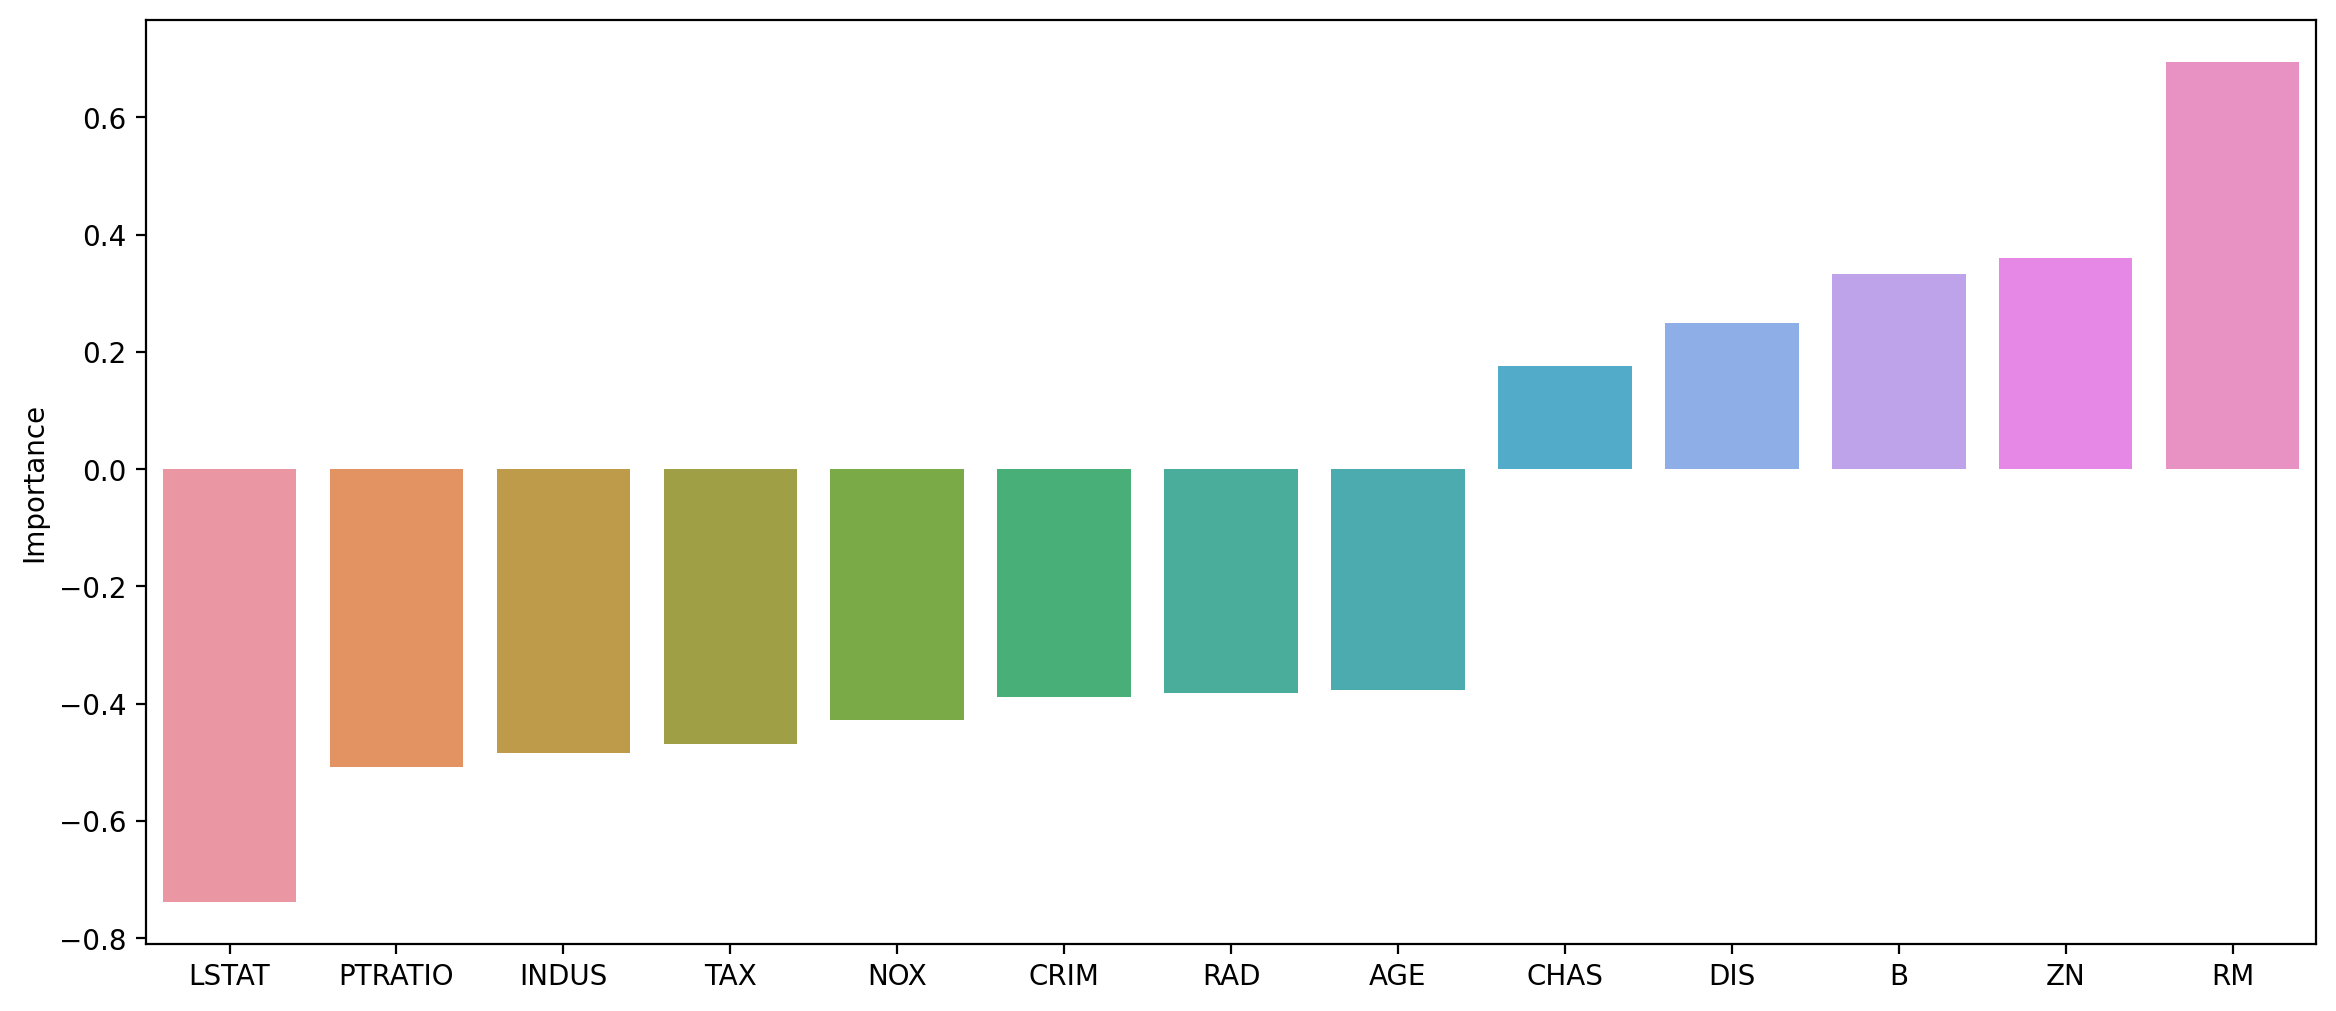

In [13]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=price_corr,x=price_corr.index,y='Importance')

<AxesSubplot: >

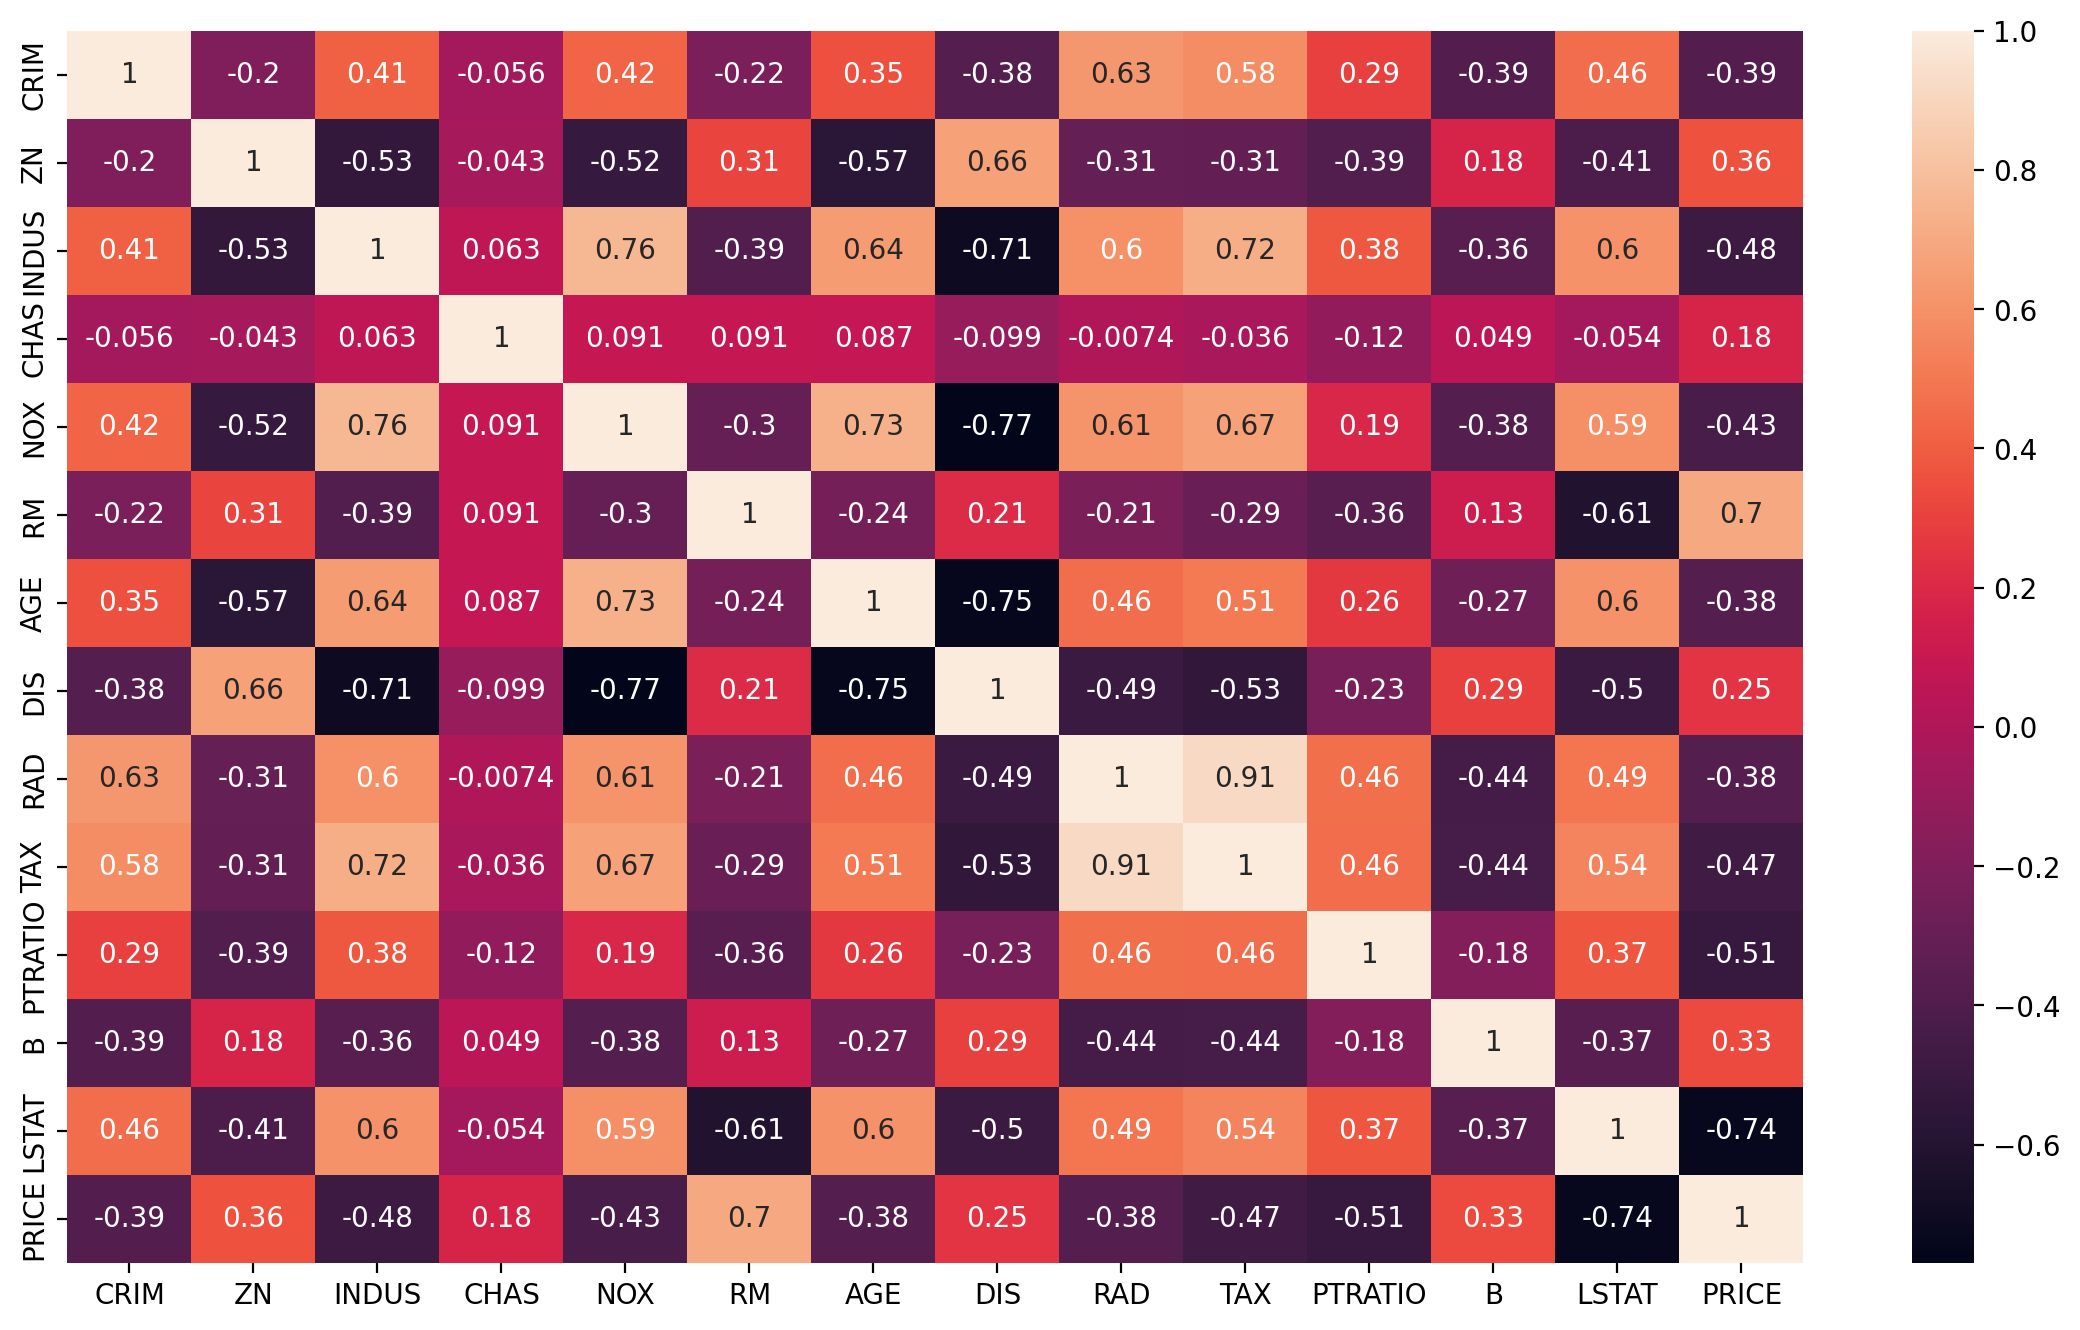

In [14]:
plt.figure(figsize=(14,8),dpi=200)
sns.heatmap(df.corr(),annot=True)

## Model

In [15]:
X = df.drop(columns='PRICE')

In [16]:
y = df['PRICE']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(X_train)

StandardScaler()

In [22]:
X_train = scaler.transform(X_train)

In [23]:
X_test = scaler.transform(X_test)

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
rfc_base = RandomForestRegressor()

In [27]:
param_grid = {'n_estimators':[10,50,100,200,300],'max_features':['sqrt','log2'],'bootstrap':[True,False],
             'max_depth':[10,15,20,'None']}

In [28]:
grid_model = GridSearchCV(estimator=rfc_base,param_grid=param_grid)

In [29]:
grid_model.fit(X_train,y_train)

/Users/veeranonthuvasin/Desktop/Major-League-Soccer/Proj/boston-house/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/veeranonthuvasin/Desktop/Major-League-Soccer/Proj/boston-house/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/veeranonthuvasin/Desktop/Major-League-Soccer/Proj/boston-house/venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 476, in fit
    trees = Parallel(
  File "

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 15, 20, 'None'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 200, 300]})

In [30]:
grid_model.best_params_

{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'log2',
 'n_estimators': 300}

In [31]:
test_pred = grid_model.predict(X_test)

In [32]:
y_test.head()

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: PRICE, dtype: float64

In [33]:
test_pred[:5]

array([24.94780659, 31.69794444, 15.7097868 , 23.01275344, 17.12331256])

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [35]:
MAE = mean_absolute_error(y_test,test_pred)

In [36]:
RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

In [37]:
MAE

1.5681232596892078

In [38]:
RMSE

2.0131896130441325

In [39]:
df['PRICE'].mean()

22.532806324110677

In [40]:
RMSE / df['PRICE'].mean() * 100

8.934482390193752

## This model accurate (with outlier data) = 91.06%